# Handwritten Digit recognition using CNN

# import the libararies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing data

In [2]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Create the model

In [22]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])



In [17]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Train the model

In [23]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 176s 373ms/step - accuracy: 0.1486 - loss: 25.2673 - val_accuracy: 0.5822 - val_loss: 2.2615
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 170s 362ms/step - accuracy: 0.3194 - loss: 10.3746 - val_accuracy: 0.7390 - val_loss: 2.2578
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 173s 368ms/step - accuracy: 0.4356 - loss: 5.8072 - val_accuracy: 0.7826 - val_loss: 2.2648
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step - accuracy: 0.5045 - loss: 3.8349 - val_accuracy: 0.7918 - val_loss: 2.2731
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 174s 371ms/step - accuracy: 0.5337 - loss: 2.8568 - val_accuracy: 0.7930 - val_loss: 2.2795
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 368ms/step - accuracy: 0.5524 - loss: 2.2637 - val_accuracy: 0.7866 - val_loss: 2.2837
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 365ms/step - accuracy: 0.5677 - loss: 1.8729 - val_accuracy: 0.7877 - val_loss: 2.2860
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 373ms/step - accuracy: 0.5808

The model has successfully trained
Saving the model as mnist.h5


# Evaluate the model

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.287489652633667
Test accuracy: 0.7835999727249146


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,380,940 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#  Predict digits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


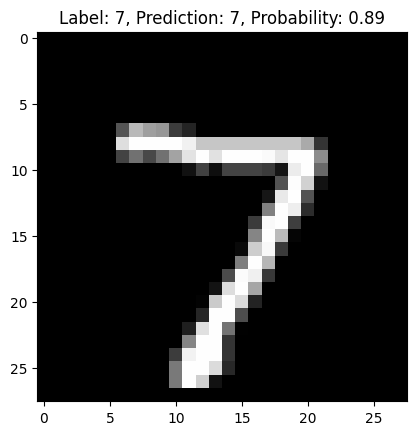

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


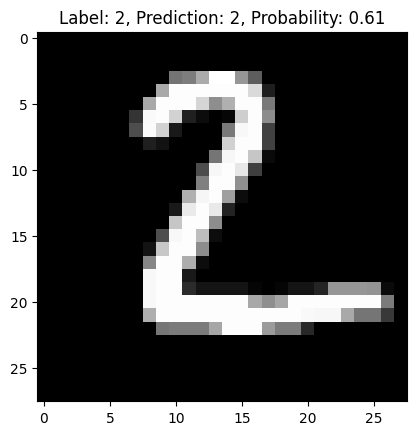

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


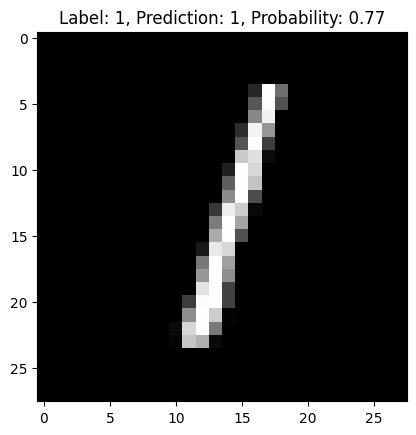

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


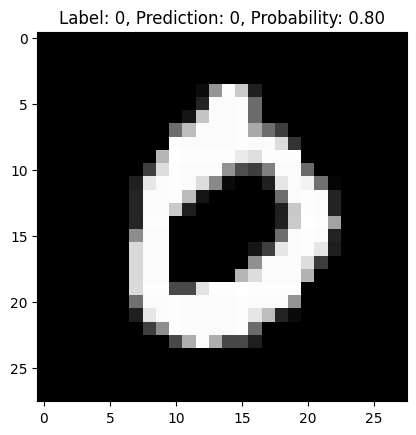

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


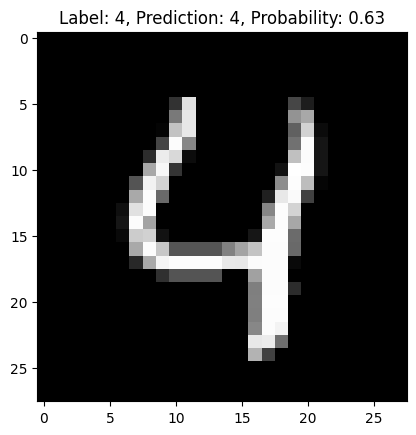

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


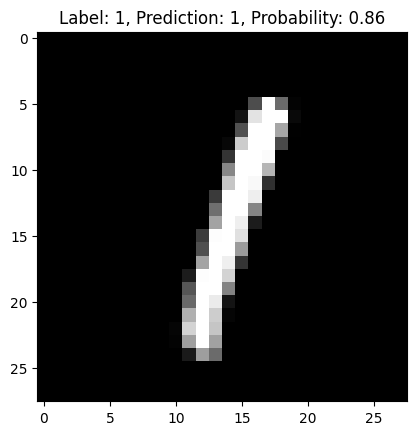

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


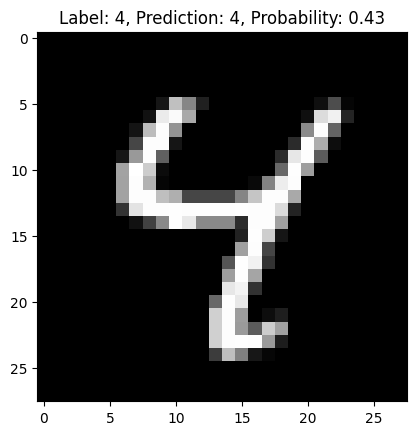

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


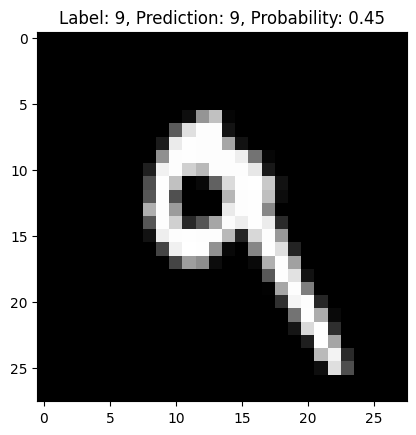

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


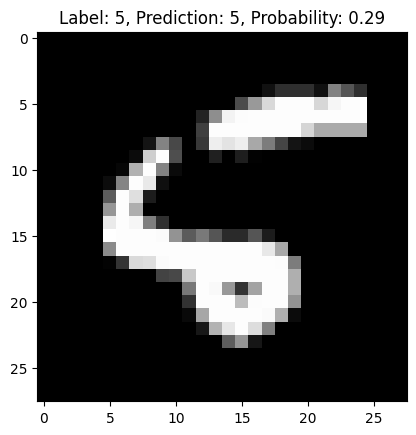

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


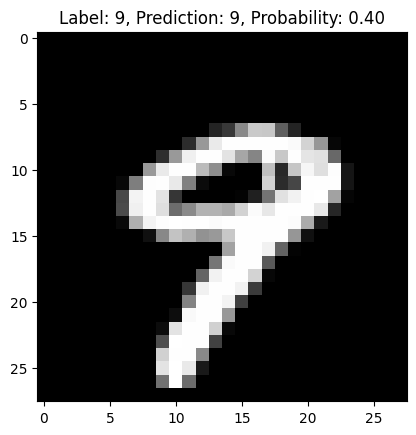

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()


In [26]:
batch_size = 128
num_classes = 10
epochs = 20
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [27]:
hist2=model2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model2.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 378ms/step - accuracy: 0.1259 - loss: 24.0683 - val_accuracy: 0.5655 - val_loss: 2.2715
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 173s 369ms/step - accuracy: 0.2749 - loss: 10.0350 - val_accuracy: 0.6917 - val_loss: 2.2664
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 374ms/step - accuracy: 0.3738 - loss: 6.2197 - val_accuracy: 0.7415 - val_loss: 2.2669
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 374ms/step - accuracy: 0.4328 - loss: 4.6079 - val_accuracy: 0.7677 - val_loss: 2.2688
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 373ms/step - accuracy: 0.4698 - loss: 3.7355 - val_accuracy: 0.7866 - val_loss: 2.2708
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 372ms/step - accuracy: 0.5089 - loss: 3.0686 - val_accuracy: 0.8061 - val_loss: 2.2727
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 375ms/step - accuracy: 0.5330 - loss: 2.5911 - val_accuracy: 0.8194 - val_loss: 2.2746
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 372ms/step - accuracy: 0.5553

The model has successfully trained
Saving the model as mnist.h5


In [28]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2783010005950928
Test accuracy: 0.8392999768257141


Before

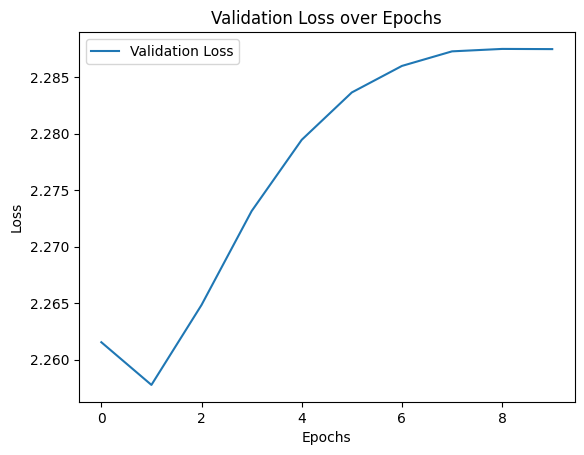

In [30]:
# Plot the validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After

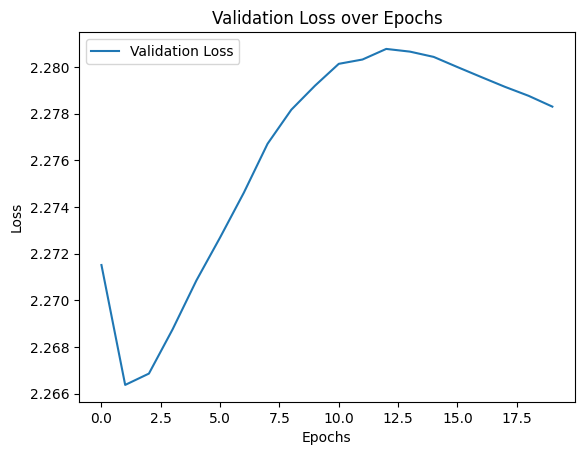

In [29]:
# Plot the validation loss
plt.plot(hist2.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()